### Import necessary modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0042_20220710")
print(df.shape)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:350: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 17534/42557/37007/37477/16764 ==> 17534/33025/32823/32829/16764
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'property_age', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Havering', 'borough_name_Hillingdon',
       'borough_name_Hounslow', 'borough_name_Islington',
       'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_Lambeth',
       'borough_name_Lewisham', 'borough_name_Merton', 'borough_name_Newham',
       'borough_name_Redbridge', 'borough_name_Sutton',
       'borough_name_Tower Hamlets', '

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.531232,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.419005,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.410316,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.394008,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.40513,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.42889,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.41013,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.428941,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.530822,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


### Get the property listings data and store in a dataframe

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15445 entries, 121061348 to 114438299
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              15445 non-null  float64
 1   location.latitude                                  15445 non-null  object 
 2   location.longitude                                 15445 non-null  float64
 3   distance_to_any_train                              15445 non-null  float64
 4   bedrooms_model                                     14793 non-null  float64
 5   bathrooms_model                                    15445 non-null  float64
 6   analyticsProperty.imageCount                       15442 non-null  float64
 7   analyticsProperty.added                            15442 non-null  float64
 8   floorplan_count                                    15445 non-null  float64
 9  

In [3]:
df[
    #['Address', 'analyticsProperty.maxSizeAc', 'analyticsProperty.maxSizeFt', 'analyticsProperty.minSizeAc', 'analyticsProperty.minSizeFt', 'date_scraped', 'date_scraped_model',     'date_scraped_model', 'date_scraped_meta']]
    #df['location.latitude'].notnull()]
    df['location.latitude'].isnull()]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [4]:
#df.loc[123715148]

In [5]:
print(df.shape)
df["location.latitude"] = pd.to_numeric(df["location.latitude"], 'coerce').dropna().astype(int)
df["analyticsProperty.imageCount"] = pd.to_numeric(df["analyticsProperty.imageCount"], 'coerce').dropna().astype(int)
df["analyticsProperty.added"] = pd.to_numeric(df["analyticsProperty.added"], 'coerce').dropna().astype(int)
print(df.shape)
df.info()

(15445, 89)
(15445, 89)
<class 'pandas.core.frame.DataFrame'>
Index: 15445 entries, 121061348 to 114438299
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Price                                              15445 non-null  float64
 1   location.latitude                                  15444 non-null  float64
 2   location.longitude                                 15445 non-null  float64
 3   distance_to_any_train                              15445 non-null  float64
 4   bedrooms_model                                     14793 non-null  float64
 5   bathrooms_model                                    15445 non-null  float64
 6   analyticsProperty.imageCount                       15442 non-null  float64
 7   analyticsProperty.added                            15442 non-null  float64
 8   floorplan_count                                    1544

In [6]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [7]:
median_bathroom = df['bathrooms_model'].median()
print(median_bathroom)

df['bathrooms_model'].fillna(median_bathroom, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

1.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [8]:
median_bedrooms = df['bedrooms_model'].median()
print(median_bedrooms)

df['bedrooms_model'].fillna(median_bedrooms, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

2.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [9]:
median_imageCount = df['analyticsProperty.imageCount'].median()
print(median_imageCount)

df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

12.0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [10]:
median_added = df['analyticsProperty.added'].median()
print(median_added)

df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

20220403.5


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [11]:
#df = df['Price'].dropna()
#sample_incomplete_rows = df[df.isnull().any(axis=1)].copy() #.head()
#sample_incomplete_rows
df = df.dropna(subset="Price")
df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121061348,200000.0,51.0,0.044065,1.9,1.0,1.0,4.0,20220314.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0
121116221,429950.0,51.0,-0.193968,0.3,1.0,2.0,6.0,20220315.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119279669,300000.0,51.0,-0.181069,0.5,1.0,1.0,7.0,20220128.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
85411182,300000.0,51.0,-0.201908,0.2,2.0,1.0,10.0,20220601.0,4.0,NaN,...,1,0,0,0,0,0,0,0,1,0
122108222,300000.0,51.0,-0.169028,0.5,2.0,1.0,9.0,20220407.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
123930668,300000.0,51.0,-0.190400,0.2,1.0,1.0,10.0,20220615.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
119855744,300000.0,51.0,-0.222060,0.3,1.0,1.0,9.0,20220211.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
122730239,300000.0,51.0,-0.190335,0.2,1.0,1.0,5.0,20220422.0,4.0,NaN,...,0,1,0,0,0,0,0,0,1,0
117322232,240000.0,51.0,0.056096,0.6,1.0,1.0,6.0,20211207.0,4.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [12]:
df.isnull().any() == True

Price                                                False
location.latitude                                    False
location.longitude                                   False
distance_to_any_train                                False
bedrooms_model                                       False
bathrooms_model                                      False
analyticsProperty.imageCount                         False
analyticsProperty.added                              False
floorplan_count                                      False
property_age                                          True
borough_name_Barking and Dagenham                    False
borough_name_Barnet                                  False
borough_name_Bexley                                  False
borough_name_City of London                          False
borough_name_Croydon                                 False
borough_name_Ealing                                  False
borough_name_Enfield                                 Fal

## Prepare data for training the model

In [13]:
print(len(df))
df = df.dropna()
print(len(df))

15444
15384


In [14]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

## Build a Random Forest model

In [15]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [16]:
print(type(y_test.values))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
metrics.mean_squared_error(y_test.values, y_pred)

4155663135.5397196

##

In [18]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

0.6679575109047176

In [19]:
sorted(zip(y_test,y_pred),reverse=True)

[(600000.0, 598844.75),
 (600000.0, 596275.0),
 (600000.0, 591874.995),
 (600000.0, 589699.0),
 (600000.0, 589450.0),
 (600000.0, 586334.875),
 (600000.0, 580562.425),
 (600000.0, 579719.4483333334),
 (600000.0, 573347.25),
 (600000.0, 572808.975),
 (600000.0, 571681.925),
 (600000.0, 569565.0),
 (600000.0, 566575.0),
 (600000.0, 563508.1),
 (600000.0, 561474.775),
 (600000.0, 561349.95),
 (600000.0, 559544.475),
 (600000.0, 558299.5),
 (600000.0, 557349.425),
 (600000.0, 555649.875),
 (600000.0, 540789.025),
 (600000.0, 532448.75),
 (600000.0, 530322.715),
 (600000.0, 530067.185),
 (600000.0, 527442.24),
 (600000.0, 526030.89),
 (600000.0, 523759.4),
 (600000.0, 519599.5),
 (600000.0, 508275.0),
 (600000.0, 506564.7),
 (600000.0, 503673.5353174603),
 (600000.0, 502275.0),
 (600000.0, 489174.16666666674),
 (600000.0, 483723.5),
 (600000.0, 482594.725),
 (600000.0, 482000.0),
 (600000.0, 478556.225),
 (600000.0, 471851.45),
 (600000.0, 452395.495),
 (600000.0, 445789.995),
 (599999.0, 5

In [20]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,600000.0,598844.750000
1,600000.0,596275.000000
2,600000.0,591874.995000
3,600000.0,589699.000000
4,600000.0,589450.000000
5,600000.0,586334.875000
6,600000.0,580562.425000
7,600000.0,579719.448333
8,600000.0,573347.250000
9,600000.0,572808.975000


In [21]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

4155663135.5397196

<AxesSubplot:xlabel='actual', ylabel='predicted'>

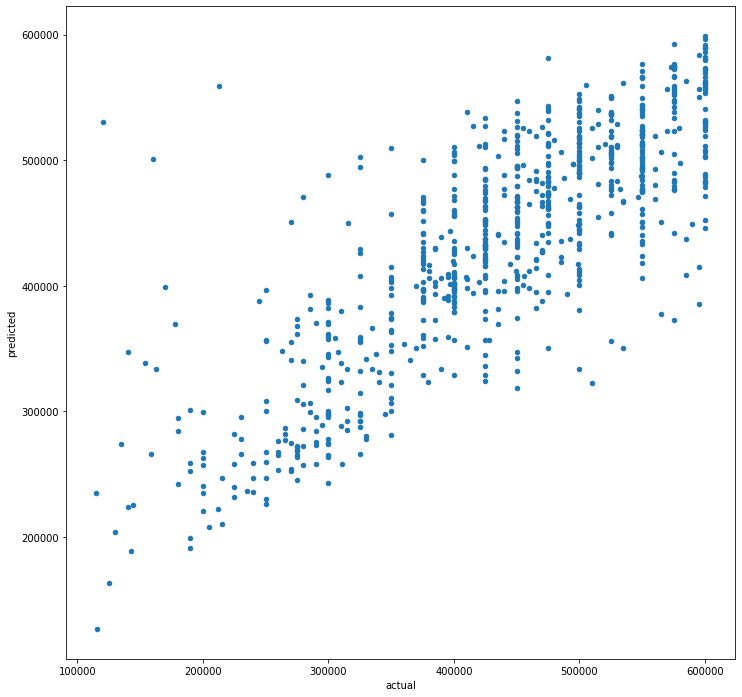

In [22]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))